# Deep Learning with Python: Deep Learing from Text and Sequences

### Work-level one-hot encoding (toy example)

In [1]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length = 10

results = np.zeros(shape=(len(samples),
                  max_length, 
                  max(token_index.values()) +1 ))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j, index] = 1

### Using Keras for word-level one-hot encoding

In [2]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# Creat a tokenizer that only includes the top 100 words
tokenizer = Tokenizer(num_words=100)
# Build the word index
tokenizer.fit_on_texts(samples)

# Turn stings into lists of integer indices
seuqences = tokenizer.texts_to_sequences(samples)

one_hit_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' %len(word_index))

Using TensorFlow backend.


Found 9 unique tokens.


### Word-Level One-Hot Encoding with hashing trick

In [3]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_lenght = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerat(samples):
    fro j, word in list(enumerate(sample.split()))[:max_length]:
        # Hashes the word into a random integer index between 0 and 1,000
        index = abs(hash(word)) % dimensionality
        results[i, j, index]  = 1

SyntaxError: invalid syntax (<ipython-input-3-013f8edb3a9f>, line 7)

### Instantiating and Embedding Layer

In [ ]:
from keras.layers import Embedding
embedding_layer = Embedding(1000,4)

### Loading the IMDB dat afor use with an Embedding Layer

In [ ]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 #Number of words to consider as features
# Cuts off the text after this number of words 
# (among the max_features most common words)
maxlen = 20 

# Load the data as a lists of intergers
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)

# Turns the lists of integers into a 2D integer tensor of shapes
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

### Ues an Embedding layer and classifier on the IMDB data

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

# model = Sequetial()
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

# Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples, maxlen * 8)
model.add(Flatten())

# Adds the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=12, 
                   validation_split=0.2)

You get to a validation accuracy of ~76%, which is pretty good considering that you’re only looking at the first 20 words in every review. But note that merely flattening the embedded sequences and training a single Dense layer on top leads to a model that treats each word in the input sequence separately, without considering inter-word relationships and sentence structure (for example, this model would likely treat both “this movie is a bomb” and “this movie is the bomb” as being negative reviews). It’s much better to add recurrent layers or 1D convolutional layers on top of the embed- ded sequences to learn features that take into account each sequence as a whole. That’s what we’ll focus on in the next few sections.

### Putting it all together: from raw text to word embeddings


You’ll use a model similar to the one we just went over: embedding sentences in sequences of vectors, flattening them, and training a Dense layer on top. But you’ll do so using pretrained word embeddings; and instead of using the pretokenized IMDB data packaged in Keras, you’ll start from scratch by downloading the original text data.

In [ ]:
import os 
imdb_dir = '/Users/Kavi/Dropbox/DataScience/Tutorials/Tutorial - Keras/Data/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        f = open(os.path.join(dir_name, fname))
        texts.append(f.read())
        f.close()
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

In [ ]:
dir_name = os.path.join(train_dir, label_type)
dir_name

### Tokenizing the text of the raw IMDB data

Let’s vectorize the text and prepare a training and validation split, using the concepts introduced earlier in this section. Because pretrained word embeddings are meant to be particularly useful on problems where little training data is available (otherwise, task-specific embeddings are likely to outperform them), we’ll add the following twist: restricting the training data to the first 200 samples. So you’ll learn to classify movie reviews after looking at just 200 examples.

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen=100
training_samples=10000
validation_samples = 200
max_words=10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' %len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splits the data into a training set and a validation set, 
# but first shuffles the data, because you’re starting with data in which samples are ordered (all negative first, then all positive)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]

labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[
training_samples: training_samples + validation_samples]

### Parsing the GloVe work-embedding file

In [ ]:
### Preparing the GloVe word-embeddings matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

### Model Definition

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

### Loading Pretrained Word Embedding into the Embedding Layer
The Embedding layer has a single weight matrix: a 2D float matrix where each entry i is the word vector meant to be associated with index i. Simple enough. Load the GloVe matrix you prepared into the Embedding layer, the first layer in the model.

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

dditionally, you’ll freeze the Embedding layer (set its trainable attribute to False), following the same rationale you’re already familiar with in the context of pretrained convnet features: when parts of a model are pretrained (like your Embedding layer) and parts are randomly initialized (like your classifier), the pretrained parts shouldn’t be updated during training, to avoid forgetting what they already know. The large gra- dient updates triggered by the randomly initialized layers would be disruptive to the already-learned features.

### Training and Evaluation

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
             metrics=['acc'])
histroy  = model.fit(x_train, y_train, epochs=10, batch_size=32,
                     validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

##### Plot the results

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Finally, let’s evaluate the model on the test data. First, you need to tokenize the test data.

### Tokenizing the data of the test set

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg','pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.array(labels)

### Evaluating the model on the test set

In [ ]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

### Understanding Recurrent Neural Networks

To make these notions of loop and state clear, let’s implement the forward pass of a toy RNN in Numpy. This RNN takes as input a sequence of vectors, which you’ll encode as a 2D tensor of size (timesteps, input_features). It loops over timesteps, and at each timestep, it considers its current state at t and the input at t (of shape (input_ features,), and combines them to obtain the output at t. You’ll then set the state for the next step to be this previous output. For the first timestep, the previous output isn’t defined; hence, there is no current state. So, you’ll initialize the state as an all- zero vector called the initial state of the network.

### Pseudocode RNN

In [ ]:
#state_t = 0
#for input_t in input_sequence:
#    output_t = f(input_t, state_t)
#    state_t = output_t

### Numpy Implementation of a simple RNN

In [ ]:
import numpy as np

timesteps = 100
input_features =32
output_features = 64

input = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output)t
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)

### A recurrent layer in Keras
he process you just naively implemented in Numpy corresponds to an actual Keras layer—the SimpleRNN layer:

In [ ]:
from keras.layers import SimpleRNN

Like all recurrent layers in Keras, SimpleRNN can be run in two different modes: it can return either the full sequences of successive outputs for each timestep (a 3D ten- sor of shape (batch_size, timesteps, output_features)) or only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)). These two modes are controlled by the return_sequences constructor argument. Let’s look at an example that uses SimpleRNN and returns only the output at the last timestep:


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32))
model.summary()

The following example returns the full state sequence:

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()


It’s sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. In such a setup, you have to get all of the intermediate layers to return full sequence of outputs:

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Now, let’s use such a model on the IMDB movie-review-classification problem. First,
preprocess the data.


### Preparing the IMDB datasets

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen =  500
batch_size = 32

print('Loading data..')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
print(len(input_train), 'train sequence')
print(len(input_test), 'test sequence')

print('Pad sequence (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_train = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train.shape:', input_train.shape)
print('input_test.shape:',input_test.shape)

### Training the model with Embedding and Simple RNN layers

In [ ]:
from keras.layers import Dense
model =  Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10,
                   batch_size=128, validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Using the LSTM layer in Keras

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128,
                   validation_split=0.2)

In [ ]:
# Fix: Creating a plotting Function
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [ ]:
plot_history(history)

This time, you achieve up to 89% validation accuracy. Not bad: certainly much better than the SimpleRNN network—that’s largely because LSTM suffers much less from the vanishing-gradient problem—and slightly better than the fully connected approach from chapter 3, even though you’re looking at less data than you were in chapter 3. You’re truncating sequences after 500 timesteps, whereas in chapter 3, you were con- sidering full sequences.

### Advanced use of recurrent neural networks

### Inspecting the data fo the Jena Weather Dataset

In [17]:
import os

data_dir = '/Users/Kavi/Dropbox/DataScience/Tutorials/Tutorial - Keras/Data'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


### Parsing the Data

In [19]:
import numpy as np
float_data = np.zeros((len(lines), len(header) -1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i,:] = values

### Plotting the temperature timeseries

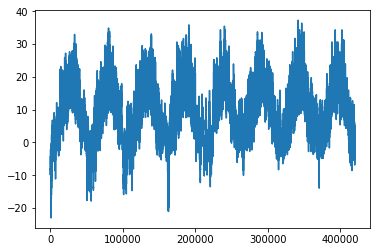

In [21]:
%matplotlib inline 

from matplotlib import pyplot as plt

temp = float_data[:,1]
plt.plot(range(len(temp)), temp)

### Plotting the first 10 days of the temperature timeseries

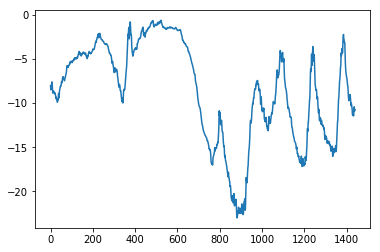

In [22]:
plt.plot(range(1440), temp[:1440])

### Forcasting

If you were trying to predict average temperature for the next month given a few months of past data, the problem would be easy, due to the reliable year-scale period- icity of the data. But looking at the data over a scale of days, the temperature looks a lot more chaotic. Is this timeseries predictable at a daily scale? Let’s find out.

### Normalizing the Data

In [23]:
mean = float_data[:200000].mean(axis=0)
mean

array([  988.88635885,     9.07734895,   283.14631345,     4.44854725,
          75.35405895,    13.3829553 ,     9.29695535,     4.08591725,
           5.8752111 ,     9.40521005,  1217.51429655,     2.1510037 ,
           3.56950915,   176.21703355])

### Generating Yielding timeseries samples and their targetm

In [37]:
def generator(data, lookback, delay, min_index, max_index,
             shuffle:False, batch_size=128, step=6):
    
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]

##### Preparing the training, validation, and test generotrs

In [ ]:
lookback = 1440
step = 6
delay = 144
batch_size =128


train_gen = generator(float_data, lookback=lookback, delay=delay, min_index=0,
                      max_index=200000., shuffle=True, step=step,
                      batch_size = batch_size)
val_gen = generator(float_data, lookback=lookback, delay=delay, min_index=200001,
                      max_index=300000., shuffle=True, step=step,
                      batch_size = batch_size)
test_gen = generator(float_data, lookback=lookback, delay=delay, min_index=300001,
                      max_index=None, shuffle=True, step=step,
                      batch_size = batch_size)

val_step = (300000 - 200001 - lookback)
test_step = (len(float_data) - 300001 - lookback)

### A commen sense, non machine learning baseline

Before you start using black-box deep-learning models to solve the temperature- prediction problem, let’s try a simple, common-sense approach. It will serve as a sanity check, and it will establish a baseline that you’ll have to beat in order to demonstrate the usefulness of more-advanced machine-learning models. Such common-sense base- lines can be useful when you’re approaching a new problem for which there is no known solution (yet). A classic example is that of unbalanced classification tasks, where some classes are much more common than others. If your dataset contains 90% instances of class A and 10% instances of class B, then a common-sense approach to the classification task is to always predict “A” when presented with a new sample. Such a classifier is 90% accurate overall, and any learning-based approach should therefore beat this 90% score in order to demonstrate usefulness. Sometimes, such elementary baselines can prove surprisingly hard to beat.

In this case, the temperature timeseries can safely be assumed to be continuous (the temperatures tomorrow are likely to be close to the temperatures today) as well as periodical with a daily period. Thus a common-sense approach is to always predict that the temperature 24 hours from now will be equal to the temperature right now. Let’s evaluate this approach, using the mean absolute error (MAE) metric:

In [ ]:
#np.mean(np.abs(preds - targets))

### Computing the common-sense baseline MAE

In [ ]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds =  sample(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_meas))
    
evaluate_naive_method()
    

This yields an MAE of 0.29. Because the temperature data has been normalized to be centered on 0 and have a standard deviation of 1, this number isn’t immediately inter- pretable. It translates to an average absolute error of 0.29 × temperature_std degrees Celsius: 2.57 ̊C.

### Converting the MAE back to a Celsuis error

In [ ]:
celsius_mae = 0.29 * std[1]
celsius_mae


That’s a fairly large average absolute error. Now the game is to use your knowledge of deep learning to do better.

### Training and Evaluating a densely connected Model

 
In the same way that it’s useful to establish a common-sense baseline before trying machine-learning approaches, it’s useful to try simple, cheap machine-learning mod- els (such as small, densely connected networks) before looking into complicated and computationally expensive models such as RNNs. This is the best way to make sure any further complexity you throw at the problem is legitimate and delivers real benefits.


The following listing shows a fully connected model that starts by flattening the data and then runs it through two Dense layers. Note the lack of activation function on the last Dense layer, which is typical for a regression problem. You use MAE as the loss. Because you evaluate on the exact same data and with the exact same metric you did with the common-sense approach, the results will be directly comparable.

### Training and Evaluating a Densely Connected Model

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense[1])

model.compile(optimizer=RMsprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500,
                             epochs=20, validation_data=val_gen,
                             validation_step=val_steps)

### Plotting Result 

In [ ]:
import matplotlib.pyplot as plt

def plot_histor(history):
    loss = history.history('loss')
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) +1)

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Trainig and Validation loss')
    plt.show()

plot_history(history)

### Triaining and Evaluating a GRU-based model

In [ ]:
from keras.model import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequetial()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history.compile(optimizer =RMSprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500,
                             epoch=20, validation_data=val_gen, 
                             validation_steps=val_steps)

In [ ]:
plot_history(history)

The new validation MAE of ~0.265 (before you start significantly overfitting) translates to a mean absolute error of 2.35 ̊C after denormalization. That’s a solid gain on the initial error of 2.57 ̊C, but you probably still have a bit of a margin for improvement.`


### Using recurrent dropout to fight overfitting

It’s evident from the training and validation curves that the model is overfitting: the training and validation losses start to diverge considerably after a few epochs. You’re already familiar with a classic technique for fighting this phenomenon: dropout, which randomly zeros out input units of a layer in order to break happenstance cor- relations in the training data that the layer is exposed to. But how to correctly apply dropout in recurrent networks isn’t a trivial question. It has long been known that applying dropout before a recurrent layer hinders learning rather than helping with regularization. In 2015, Yarin Gal, as part of his PhD thesis on Bayesian deep learn- ing,6 determined the proper way to use dropout with a recurrent network: the same dropout mask (the same pattern of dropped units) should be applied at every time- step, instead of a dropout mask that varies randomly from timestep to timestep. What’s more, in order to regularize the representations formed by the recurrent gates of layers such as GRU and LSTM, a temporally constant dropout mask should be applied to the inner recurrent activations of the layer (a recurrent dropout mask). Using the same dropout mask at every timestep allows the network to properly propagate its learning error through time; a temporally random dropout mask would disrupt this error signal and be harmful to the learning process.


Yarin Gal did his research using Keras and helped build this mechanism directly into Keras recurrent layers. Every recurrent layer in Keras has two dropout-related arguments: dropout, a float specifying the dropout rate for input units of the layer,
 

### Training and evaluating a dropout-regularized GRU-based model

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers improt RMSprop

model = Sequential()
model.add(layers.GRU(32, dropout=0.2, 
                     input_shape=(None, float_data.shape[-1])))
model.compile(optimizer=RMSprpo(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, 
                             epochs=40, validation_data=val_gen, 
                             validation_steps=val_steps)



Figure 6.22 shows the results. Success! You’re no longer overfitting during the first 30 epochs. But although you have more stable evaluation scores, your best scores aren’t much lower than they were previously.

### Stacking Recurrent Layers


Because you’re no longer overfitting but seem to have hit a performance bottleneck, you should consider increasing the capacity of the network. Recall the description of the universal machine-learning workflow: it’s generally a good idea to increase the capacity of your network until overfitting becomes the primary obstacle (assuming you’re already taking basic steps to mitigate overfitting, such as using dropout). As long as you aren’t overfitting too badly, you’re likely under capacity.

### Trainign and Evaluating a drop-out regularized, stacked GRU model

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, recurrent_dropout=0.5, return_sequence=True,
                    input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu', dropout=0.1, 
                     recurrent_dropout=0.5))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500,
                             epochs=40, validation_data=val_gen, 
                             validation_steps=val_steps)

Figure 6.23 shows the results. You can see that the added layer does improve the results a bit, though not significantly. You can draw two conclusions:
- Because you’re still not overfitting too badly, you could safely increase the size of your layers in a quest for validation-loss improvement. This has a non-negligible computational cost, though.
- Adding a layer didn’t help by a significant factor, so you may be seeing diminish- ing returns from increasing network capacity at this point.

In [ ]:
plot_history(history)

### Using Bidirectional RNNS

The last technique introduced in this section is called bidirectional RNNs. A bidirec- tional RNN is a common RNN variant that can offer greater performance than a regu- lar RNN on certain tasks. It’s frequently used in natural-language processing—you could call it the Swiss Army knife of deep learning for natural-language processing. RNNs are notably order dependent, or time dependent: they process the timesteps of their input sequences in order, and shuffling or reversing the timesteps can com- pletely change the representations the RNN extracts from the sequence. This is pre- cisely the reason they perform well on problems where order is meaningful, such as the temperature-forecasting problem. A bidirectional RNN exploits the order sensitiv- ity of RNNs: it consists of using two regular RNNs, such as the GRU and LSTM layers you’re already familiar with, each of which processes the input sequence in one direc- tion (chronologically and antichronologically), and then merging their representa- tions. By processing a sequence both ways, a bidirectional RNN can catch patterns that may be overlooked by a unidirectional RNN.

Remarkably, the fact that the RNN layers in this section have processed sequences in chronological order (older timesteps first) may have been an arbitrary decision. At least, it’s a decision we made no attempt to question so far. Could the RNNs have performed well enough if they processed input sequences in antichronological order, for instance (newer timesteps first)? Let’s try this in practice and see what happens. All you need to do is write a variant of the data generator where the input sequences are reverted along the time dimension (replace the last line with yield samples[:, ::-1, :], targets). Training the same one-GRU-layer network that you used in the first experiment in this section, you get the results shown in figure 6.24.

### Training and Evaluating an LSTM using reversed sequences

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from kears.models import Sequential

max_features = 100000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)
x_train = [x[::-1] for x in x_train]
x_test = [x::-1 for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequneces(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(12))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
             metric =['acc'])

history = model.fit(x_train, y_train, epochs=10,
                    batch_size=128,
                    validation_split=0.2)

You get performance nearly identical to that of the chronological-order LSTM. Remarkably, on such a text dataset, reversed-order processing works just as well as chronological processing, confirming the hypothesis that, although word order does matter in understanding language, which order you use isn’t crucial. Importantly, an RNN trained on reversed sequences will learn different representations than one trained on the original sequences, much as you would have different mental models if time flowed backward in the real world—if you lived a life where you died on your first day and were born on your last day. In machine learning, representations that are dif- ferent yet useful are always worth exploiting, and the more they differ, the better: they offer a new angle from which to look at your data, capturing aspects of the data that were missed by other approaches, and thus they can help boost performance on a task. This is the intuition behind ensembling, a concept we’ll explore in chapter 7.

### Training and Evaluating a Bidirectional LSTM

To instantiate a bidirectional RNN in Keras, you use the Bidirectional layer, which takes as its first argument a recurrent layer instance. Bidirectional creates a second, separate instance of this recurrent layer and uses one instance for processing the input sequences in chronological order and the other instance for processing the input sequences in reversed order. Let’s try it on the IMDB sentiment-analysis task.

In [ ]:
model= Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
             metrics =['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                   validation_split=0.2)


### Training a Bidirectioanl GRU

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(
            layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.compile(optimizer=RMSprop(), loss='mae')
histor = model.fit_generator(train_gen, 
                            steps_per_epoch=500,
                            epochs = 40,
                            validation_data = val_gen,
                            validation_steps = val_steps)

This performs about as well as the regular GRU layer. It’s easy to understand why: all the predictive capacity must come from the chronological half of the network, because the antichronological half is known to be severely underperforming on this task (again, because the recent past matters much more than the distant past in this case).